In [1]:
from pycoral.adapters import common, detect
from pycoral.utils.dataset import read_label_file
from pycoral.utils.edgetpu import make_interpreter

In [2]:
import numpy as np
import cv2

In [3]:
import tflite_runtime.interpreter as tflite

In [4]:
delegates = tflite.load_delegate('libedgetpu.so.1')

In [5]:
delegates

In [4]:
# interpreter = tflite.Interpreter(model_path='artifacts/yolov8.tflite', experimental_delegates=[delegates])
interpreter = tflite.Interpreter(model_path='artifacts/ssdlite_mobiledet_car_v2.tflite')

# interpreter = tflite.Interpreter(model_path='artifacts/ssdlite_mobiledet_car_v2_edgetpu.tflite', experimental_delegates=[delegates])
# interpreter = tflite.Interpreter(model_path='artifacts/ssdlite_mobiledet_coco_qat_postprocess_edgetpu.tflite', experimental_delegates=[delegates])



In [5]:
interpreter.allocate_tensors()

In [6]:
def resize_with_padding_pillow(img, desired_size=320):
    """Resizes an image with padding using Pillow (PIL).

    Args:
        img (PIL.Image): The input image.
        desired_size (int): The desired output size (assumes square output).

    Returns:
        PIL.Image: The resized and padded image.
    """

    old_size = img.size  # (width, height)
    ratio = float(desired_size) / max(old_size)  # Calculate scaling ratio
    new_size = tuple([int(x * ratio) for x in old_size])  # Compute new dimensions

    # Resize the image with high-quality resampling 
    img = img.resize(new_size, Image.ANTIALIAS)

    # Calculate padding needed
    new_img = Image.new("RGB", (desired_size, desired_size), (0, 0, 0))  # Black background
    pad_w = (desired_size - new_size[0]) // 2
    pad_h = (desired_size - new_size[1]) // 2

    # Paste the resized image onto the new image with padding
    new_img.paste(img, (pad_w, pad_h))

    return new_img

In [7]:
# def load_model():
#     labels = read_label_file('./coral-tpu-object-detection-rpi5/server/artifacts/labels.txt')
#     interpreter = make_interpreter('./coral-tpu-object-detection-rpi5/server/artifacts/model.tflite')
#     # interpreter = make_interpreter('./coral-tpu-object-detection-rpi5/server/artifacts/ssd_model.tflite')
#     interpreter.allocate_tensors()
#     return interpreter, labels

In [8]:
# interpreter, labels = load_model()

In [9]:
! pwd

/home/ajmalrasi/projects


/tmp/ipykernel_7143/1893507232.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(new_size, Image.ANTIALIAS)


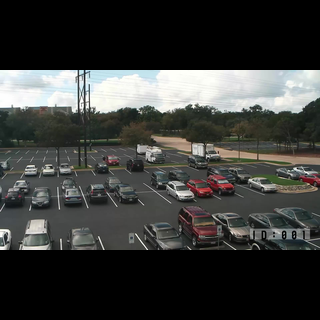

In [10]:
from PIL import Image
import requests
from io import BytesIO

# response = requests.get("https://ultralytics.com/images/bus.jpg")
# image_bytes = BytesIO(response.content)
# image = Image.open(image_bytes)
image = Image.open("detection_server/output_image0003.jpg")
image = resize_with_padding_pillow(image, desired_size=320)
image

# input details

In [11]:
input_details = interpreter.get_input_details()
input_details

[{'name': 'normalized_input_image_tensor',
  'index': 0,
  'shape': array([  1, 320, 320,   3], dtype=int32),
  'shape_signature': array([  1, 320, 320,   3], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.0078125, 128),
  'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
   'zero_points': array([128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [12]:
input_tensor_idx = interpreter.get_input_details()[0]['index']
input_tensor_idx

0

In [13]:
# input_tensor = interpreter.tensor(input_tesnor_idx)()

In [14]:
scale, zero_point = input_details[0]["quantization"]
scale, zero_point

(0.0078125, 128)

# output details

In [15]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'TFLite_Detection_PostProcess',
  'index': 327,
  'shape': array([  1, 100,   4], dtype=int32),
  'shape_signature': array([  1, 100,   4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:1',
  'index': 328,
  'shape': array([  1, 100], dtype=int32),
  'shape_signature': array([  1, 100], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:2',
  'index': 329,
  'shape': array([  1, 100], dtype=int32),
  'shape_signature': array([  1, 100], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters

In [16]:
# output_tensor_idx = interpreter.get_output_details()[0]['index']
# output_tensor_idx

In [17]:
scale, zero_point = output_details[0]["quantization"]
scale, zero_point

(0.0, 0)

In [18]:
# output_tensor = interpreter.tensor(output_tensor_idx)()

In [19]:
# output_tensor

# pred

In [20]:
# def preprocess_inputs(image):
#     numpy_image = np.array(image).astype(np.float32)
#     # expand dims
#     input_tensor = np.expand_dims(numpy_image, axis = 0)
#     # scale 
#     return np.clip(np.divide(input_tensor, 255) * 127.0, -128, 127).astype(np.int8)

In [23]:
# def detect(interpreter):
#     output_tensor = interpreter.get_tensor(47)
#     # output = (output_tensor.astype(np.float32) - zero_point) * scale

In [24]:
# %%time
# for i in range(1000):
#     # expand dims
#     input_tensor = np.expand_dims(np.array(image).astype(np.float32), axis = 0)

#     # scale 
#     scaled_input_tensor = np.clip(np.divide(input_tensor, 255) * 127.0, -128, 127).astype(np.int8)
    

In [25]:
# %%time
# for i in range(100):
#     interpreter.invoke()

In [21]:
# input_img_tensor = np.expand_dims(np.array(image).astype(np.float32), axis = 0)
input_img_tensor = np.expand_dims(np.array(image).astype(np.uint8), axis = 0)

input_img_tensor.shape

(1, 320, 320, 3)

In [22]:
# input_data = input_img_tensor / 255.0
# input_data[:3,:3,:3,:3]

In [23]:
# input_data = np.clip(input_data * 127.0, -128, 127).astype(np.int8)
# input_data

In [24]:
input_tensor_idx

0

In [25]:
# interpreter.set_tensor(input_tensor_idx, input_data)
interpreter.set_tensor(input_tensor_idx, input_img_tensor)


In [26]:
interpreter.invoke()

In [27]:
# interpreter.get_tensor(output_tensor_idx)

## output

In [28]:
sec = interpreter.get_tensor(1)

In [29]:
sec

array([   1, 2034,    4], dtype=int32)

In [30]:
output_details

[{'name': 'TFLite_Detection_PostProcess',
  'index': 327,
  'shape': array([  1, 100,   4], dtype=int32),
  'shape_signature': array([  1, 100,   4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:1',
  'index': 328,
  'shape': array([  1, 100], dtype=int32),
  'shape_signature': array([  1, 100], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:2',
  'index': 329,
  'shape': array([  1, 100], dtype=int32),
  'shape_signature': array([  1, 100], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters

In [31]:
output_tensor = interpreter.get_tensor(329)


In [33]:
output_tensor

array([[0.82421875, 0.76171875, 0.76171875, 0.76171875, 0.76171875,
        0.76171875, 0.68359375, 0.68359375, 0.640625  , 0.640625  ,
        0.640625  , 0.59375   , 0.59375   , 0.59375   , 0.59375   ,
        0.59375   , 0.546875  , 0.546875  , 0.546875  , 0.5       ,
        0.5       , 0.453125  , 0.40625   , 0.40625   , 0.40625   ,
        0.40625   , 0.359375  , 0.359375  , 0.359375  , 0.359375  ,
        0.359375  , 0.359375  , 0.31640625, 0.31640625, 0.31640625,
        0.27734375, 0.27734375, 0.27734375, 0.27734375, 0.27734375,
        0.27734375, 0.27734375, 0.23828125, 0.23828125, 0.23828125,
        0.23828125, 0.23828125, 0.23828125, 0.23828125, 0.20703125,
        0.20703125, 0.20703125, 0.20703125, 0.17578125, 0.17578125,
        0.17578125, 0.17578125, 0.17578125, 0.17578125, 0.17578125,
        0.17578125, 0.15234375, 0.15234375, 0.15234375, 0.15234375,
        0.15234375, 0.15234375, 0.15234375, 0.15234375, 0.12890625,
        0.12890625, 0.12890625, 0.12890625, 0.12

In [36]:
output_tensor = interpreter.get_tensor(8)

In [39]:
output_tensor 

array([[0.82421875, 0.76171875, 0.76171875, 0.76171875, 0.76171875,
        0.76171875, 0.640625  , 0.640625  , 0.640625  , 0.640625  ,
        0.640625  , 0.59375   , 0.59375   , 0.59375   , 0.59375   ,
        0.546875  , 0.546875  , 0.5       , 0.5       , 0.5       ,
        0.453125  , 0.453125  , 0.453125  , 0.40625   , 0.40625   ,
        0.40625   , 0.40625   , 0.40625   , 0.359375  , 0.359375  ,
        0.359375  , 0.359375  , 0.31640625, 0.31640625, 0.31640625,
        0.31640625, 0.31640625, 0.27734375, 0.27734375, 0.27734375,
        0.27734375, 0.27734375, 0.27734375, 0.27734375, 0.23828125,
        0.23828125, 0.23828125, 0.23828125, 0.23828125, 0.23828125,
        0.20703125, 0.20703125, 0.20703125, 0.20703125, 0.20703125,
        0.20703125, 0.20703125, 0.17578125, 0.17578125, 0.15234375,
        0.15234375, 0.15234375, 0.15234375, 0.15234375, 0.15234375,
        0.15234375, 0.15234375, 0.12890625, 0.12890625, 0.12890625,
        0.12890625, 0.12890625, 0.12890625, 0.12

In [45]:
output_tensor

array([[0.4140625 , 0.39453125, 0.328125  , 0.2578125 , 0.2578125 ,
        0.21875   , 0.21875   , 0.1953125 , 0.17578125, 0.15625   ,
        0.15625   , 0.14453125, 0.14453125, 0.12109375, 0.12109375,
        0.12109375, 0.12109375, 0.11328125, 0.11328125, 0.11328125,
        0.10546875, 0.10546875, 0.1015625 , 0.1015625 , 0.1015625 ,
        0.09375   , 0.09375   , 0.09375   , 0.09375   , 0.08984375,
        0.08984375, 0.08203125, 0.08203125, 0.08203125, 0.08203125,
        0.08203125, 0.08203125, 0.08203125, 0.08203125, 0.078125  ,
        0.078125  , 0.078125  , 0.07421875, 0.07421875, 0.07421875,
        0.06640625, 0.06640625, 0.06640625, 0.0625    , 0.0625    ,
        0.0625    , 0.0625    , 0.0625    , 0.05859375, 0.05859375,
        0.05859375, 0.0546875 , 0.0546875 , 0.0546875 , 0.0546875 ,
        0.0546875 , 0.0546875 , 0.0546875 , 0.0546875 , 0.0546875 ,
        0.0546875 , 0.0546875 , 0.05078125, 0.05078125, 0.05078125,
        0.05078125, 0.046875  , 0.046875  , 0.04

In [41]:
output_tensor

array([[0.66796875, 0.65625   , 0.63671875, 0.625     , 0.625     ,
        0.61328125, 0.60546875, 0.60546875, 0.58203125, 0.55859375,
        0.55859375, 0.546875  , 0.546875  , 0.53515625, 0.53515625,
        0.5234375 , 0.5234375 , 0.5234375 , 0.51171875, 0.51171875,
        0.51171875, 0.5       , 0.5       , 0.5       , 0.48828125,
        0.48828125, 0.48828125, 0.48828125, 0.4765625 , 0.4765625 ,
        0.4765625 , 0.4765625 , 0.4765625 , 0.46484375, 0.46484375,
        0.46484375, 0.453125  , 0.453125  , 0.453125  , 0.453125  ,
        0.44140625, 0.44140625, 0.41796875, 0.41796875, 0.40625   ,
        0.40625   , 0.40625   , 0.39453125, 0.39453125, 0.39453125,
        0.39453125, 0.38671875, 0.38671875, 0.38671875, 0.375     ,
        0.375     , 0.375     , 0.375     , 0.3515625 , 0.3515625 ,
        0.3515625 , 0.34375   , 0.34375   , 0.33203125, 0.33203125,
        0.33203125, 0.33203125, 0.3203125 , 0.3203125 , 0.3203125 ,
        0.3125    , 0.30078125, 0.30078125, 0.30

In [39]:
# output = (output_tensor.astype(np.float32) - zero_point) * scale

In [40]:
output

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

# debug

In [62]:
zero_point

0

In [32]:
output = (output_tensor.astype(np.float32) - zero_point) * scale

In [33]:
output

array([[[0.00797205, 0.02391615, 0.02790217, ..., 0.87293935,
         0.9407017 , 0.9446878 ],
        [0.03986024, 0.03188819, 0.02790217, ..., 0.9207716 ,
         0.8848974 , 0.88091135],
        [0.00797205, 0.03986024, 0.05580434, ..., 0.2152453 ,
         0.12356675, 0.12755278],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)

In [34]:
# output[:,4:] [output[:,4:] > 0.5]

In [35]:
dims = np.where(output[:,4:] > 0.8)

In [36]:
dims

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5]),
 array([8207, 8208, 8224, 8225, 8227, 8228, 8236, 8244, 8245, 8247, 8248,
        8255, 8256, 8264, 8265, 8276, 8284, 8285, 8149, 8169, 8170, 8190]))

In [37]:
actual_dims = dims[0], dims[1] + 4, dims[2]

In [38]:
actual_dims

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9]),
 array([8207, 8208, 8224, 8225, 8227, 8228, 8236, 8244, 8245, 8247, 8248,
        8255, 8256, 8264, 8265, 8276, 8284, 8285, 8149, 8169, 8170, 8190]))

In [39]:
scores = output[actual_dims]
scores

array([0.8569952 , 0.8569952 , 0.82510704, 0.82510704, 0.9008415 ,
       0.87692535, 0.8569952 , 0.8569952 , 0.9008415 , 0.8569952 ,
       0.8569952 , 0.82510704, 0.8569952 , 0.8569952 , 0.8569952 ,
       0.82510704, 0.82510704, 0.87692535, 0.82510704, 0.82510704,
       0.82510704, 0.82510704], dtype=float32)

In [52]:
boxes = output[0,:4,dims[-1]] * 640
boxes

array([[244.90134 , 375.00516 ,  68.878494, 262.75873 ],
       [247.4524  , 375.00516 ,  68.878494, 262.75873 ],
       [168.36967 , 387.76044 , 112.246445, 301.02454 ],
       [168.36967 , 387.76044 , 112.246445, 301.02454 ],
       [247.4524  , 375.00516 ,  66.327446, 262.75873 ],
       [247.4524  , 375.00516 ,  68.878494, 267.86084 ],
       [520.41534 , 377.5562  ,  81.63377 , 288.2693  ],
       [170.92072 , 385.20938 , 112.246445, 301.02454 ],
       [168.36967 , 385.20938 , 112.246445, 301.02454 ],
       [244.90134 , 375.00516 ,  68.878494, 257.65662 ],
       [247.4524  , 369.90308 ,  71.42956 , 260.20767 ],
       [520.41534 , 375.00516 ,  81.63377 , 285.71823 ],
       [520.41534 , 372.4541  ,  79.082726, 288.2693  ],
       [170.92072 , 385.20938 , 112.246445, 295.92245 ],
       [168.36967 , 385.20938 , 112.246445, 298.47348 ],
       [520.41534 , 375.00516 ,  79.082726, 283.16718 ],
       [170.92072 , 382.65836 , 109.69539 , 301.02454 ],
       [170.92072 , 382.65836 ,

In [53]:
bbox = np.array([boxes[:,0] - (boxes[:,2] / 2), boxes[:,1] - (boxes[:,3] / 2), boxes[:,0] + (boxes[:,2] / 2), boxes[:,1] + (boxes[:,3] / 2)], dtype=np.int32).T

In [54]:
bbox

array([[210, 243, 279, 506],
       [213, 243, 281, 506],
       [112, 237, 224, 538],
       [112, 237, 224, 538],
       [214, 243, 280, 506],
       [213, 241, 281, 508],
       [479, 233, 561, 521],
       [114, 234, 227, 535],
       [112, 234, 224, 535],
       [210, 246, 279, 503],
       [211, 239, 283, 500],
       [479, 232, 561, 517],
       [480, 228, 559, 516],
       [114, 237, 227, 533],
       [112, 235, 224, 534],
       [480, 233, 559, 516],
       [116, 232, 225, 533],
       [113, 232, 228, 533],
       [100, 140, 552, 446],
       [ 99, 135, 553, 461],
       [102, 140, 551, 446],
       [100, 140, 552, 446]], dtype=int32)

In [57]:
scores

array([0.8569952 , 0.8569952 , 0.82510704, 0.82510704, 0.9008415 ,
       0.87692535, 0.8569952 , 0.8569952 , 0.9008415 , 0.8569952 ,
       0.8569952 , 0.82510704, 0.8569952 , 0.8569952 , 0.8569952 ,
       0.82510704, 0.82510704, 0.87692535, 0.82510704, 0.82510704,
       0.82510704, 0.82510704], dtype=float32)

In [60]:
dims[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5])

In [56]:
#boxes
idx = cv2.dnn.NMSBoxes(bbox, scores, 0.5, 0.8)
idx

array([ 4,  8,  6, 18], dtype=int32)

In [58]:
scores[idx]

array([0.9008415 , 0.9008415 , 0.8569952 , 0.82510704], dtype=float32)

In [61]:
dims[1][idx]

array([0, 0, 0, 5])

In [62]:
bbox[idx]

array([[214, 243, 280, 506],
       [112, 234, 224, 535],
       [479, 233, 561, 521],
       [100, 140, 552, 446]], dtype=int32)

In [69]:
quantization_params = config['output']['postprocessing']["quantization"]

In [70]:
quantization_params

{'scales': 0.003986024297773838, 'zero_point': -128, 'type': 'float32'}

In [72]:
tensor = (output_tensor.astype(np.float32) - quantization_params["zero_point"]) * quantization_params["scales"]

In [73]:
tensor

array([[[0.00797205, 0.02391615, 0.02790217, ..., 0.87293935,
         0.9407017 , 0.9446878 ],
        [0.03986024, 0.03188819, 0.02790217, ..., 0.9207716 ,
         0.8848974 , 0.88091135],
        [0.00797205, 0.03986024, 0.05580434, ..., 0.2152453 ,
         0.12356675, 0.12755278],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)

In [74]:
pp_params = config['output']['postprocessing']
pp_params

{'confidence_threshold': 0.6,
 'iou_threshold': 0.6,
 'top_k': 0.8,
 'dtype': 'uint8',
 'quantization': {'scales': 0.003986024297773838,
  'zero_point': -128,
  'type': 'float32'}}

In [75]:
dims = np.nonzero(tensor[:,4:] > pp_params["top_k"])

In [76]:
dims

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5]),
 array([8207, 8208, 8224, 8225, 8227, 8228, 8236, 8244, 8245, 8247, 8248,
        8255, 8256, 8264, 8265, 8276, 8284, 8285, 8149, 8169, 8170, 8190]))

In [77]:
actual_dims = dims[0], dims[1] + 4, dims[2]
actual_dims

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9]),
 array([8207, 8208, 8224, 8225, 8227, 8228, 8236, 8244, 8245, 8247, 8248,
        8255, 8256, 8264, 8265, 8276, 8284, 8285, 8149, 8169, 8170, 8190]))

In [78]:
classes = dims[1]
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5])

In [79]:
scores = tensor[actual_dims]
scores

array([0.8569952 , 0.8569952 , 0.82510704, 0.82510704, 0.9008415 ,
       0.87692535, 0.8569952 , 0.8569952 , 0.9008415 , 0.8569952 ,
       0.8569952 , 0.82510704, 0.8569952 , 0.8569952 , 0.8569952 ,
       0.82510704, 0.82510704, 0.87692535, 0.82510704, 0.82510704,
       0.82510704, 0.82510704], dtype=float32)

In [80]:
boxes = tensor[0, :4, dims[-1]]
boxes

array([[0.38265833, 0.58594555, 0.10762265, 0.4105605 ],
       [0.38664436, 0.58594555, 0.10762265, 0.4105605 ],
       [0.26307762, 0.6058757 , 0.17538507, 0.47035086],
       [0.26307762, 0.6058757 , 0.17538507, 0.47035086],
       [0.38664436, 0.58594555, 0.10363663, 0.4105605 ],
       [0.38664436, 0.58594555, 0.10762265, 0.41853255],
       [0.813149  , 0.5899316 , 0.12755278, 0.45042074],
       [0.26706362, 0.60188967, 0.17538507, 0.47035086],
       [0.26307762, 0.60188967, 0.17538507, 0.47035086],
       [0.38265833, 0.58594555, 0.10762265, 0.40258846],
       [0.38664436, 0.57797354, 0.11160868, 0.4065745 ],
       [0.813149  , 0.58594555, 0.12755278, 0.44643474],
       [0.813149  , 0.58195955, 0.12356675, 0.45042074],
       [0.26706362, 0.60188967, 0.17538507, 0.46237883],
       [0.26307762, 0.60188967, 0.17538507, 0.46636483],
       [0.813149  , 0.58594555, 0.12356675, 0.4424487 ],
       [0.26706362, 0.59790367, 0.17139904, 0.47035086],
       [0.26706362, 0.59790367,

In [81]:
boxes = (boxes * config['input']['shape'][1])
boxes

array([[244.90134 , 375.00516 ,  68.878494, 262.75873 ],
       [247.4524  , 375.00516 ,  68.878494, 262.75873 ],
       [168.36967 , 387.76044 , 112.246445, 301.02454 ],
       [168.36967 , 387.76044 , 112.246445, 301.02454 ],
       [247.4524  , 375.00516 ,  66.327446, 262.75873 ],
       [247.4524  , 375.00516 ,  68.878494, 267.86084 ],
       [520.41534 , 377.5562  ,  81.63377 , 288.2693  ],
       [170.92072 , 385.20938 , 112.246445, 301.02454 ],
       [168.36967 , 385.20938 , 112.246445, 301.02454 ],
       [244.90134 , 375.00516 ,  68.878494, 257.65662 ],
       [247.4524  , 369.90308 ,  71.42956 , 260.20767 ],
       [520.41534 , 375.00516 ,  81.63377 , 285.71823 ],
       [520.41534 , 372.4541  ,  79.082726, 288.2693  ],
       [170.92072 , 385.20938 , 112.246445, 295.92245 ],
       [168.36967 , 385.20938 , 112.246445, 298.47348 ],
       [520.41534 , 375.00516 ,  79.082726, 283.16718 ],
       [170.92072 , 382.65836 , 109.69539 , 301.02454 ],
       [170.92072 , 382.65836 ,

In [82]:
boxes_scaled = np.array([boxes[:,0] - (boxes[:,2] / 2),
                         boxes[:,1] - (boxes[:,3] / 2),
                         boxes[:,0] + (boxes[:,2] / 2),
                         boxes[:,1] + (boxes[:,3] / 2)],
                         dtype=np.int32).T
boxes_scaled

array([[210, 243, 279, 506],
       [213, 243, 281, 506],
       [112, 237, 224, 538],
       [112, 237, 224, 538],
       [214, 243, 280, 506],
       [213, 241, 281, 508],
       [479, 233, 561, 521],
       [114, 234, 227, 535],
       [112, 234, 224, 535],
       [210, 246, 279, 503],
       [211, 239, 283, 500],
       [479, 232, 561, 517],
       [480, 228, 559, 516],
       [114, 237, 227, 533],
       [112, 235, 224, 534],
       [480, 233, 559, 516],
       [116, 232, 225, 533],
       [113, 232, 228, 533],
       [100, 140, 552, 446],
       [ 99, 135, 553, 461],
       [102, 140, 551, 446],
       [100, 140, 552, 446]], dtype=int32)

In [83]:
idx = cv2.dnn.NMSBoxes(boxes_scaled, scores,
                       pp_params["confidence_threshold"],
                       pp_params["iou_threshold"])

In [87]:
tuple(boxes_scaled[0])

(210, 243, 279, 506)

In [3]:
import yaml
import numpy as np
from pycoral.utils.dataset import read_label_file
from pycoral.utils.edgetpu import make_interpreter
import cv2
import collections
import time
from pycoral.adapters import common
from pycoral.adapters import detect

In [4]:
Object = collections.namedtuple('Object', ['id', 'score', 'bbox'])
BBox = collections.namedtuple('BBox', ['xmin', 'ymin', 'xmax', 'ymax'])

In [5]:
def read_yaml():
    try:
        CONFIG_PATH = '../configs/model_config.yaml'
        with open(CONFIG_PATH, 'r') as f:
            config = yaml.safe_load(f)
    except Exception as e:
        print("Failed to read yaml file. {}".format(CONFIG_PATH))
        raise e
    return config

config = read_yaml()

In [6]:
config

{'model': {'path': 'artifacts/ssdlite_mobiledet_car_v2_edgetpu.tflite',
  'type': 'SSD'},
 'input': {'shape': [1, 320, 320, 3],
  'preprocessing': {'normalization': [-128, 127], 'dtype': 'uint8'},
  'tensor_id': 0},
 'output': {'label_file_path': 'artifacts/car_labels.txt',
  'tensor_id': [47],
  'postprocessing': {'confidence_threshold': 0.6,
   'iou_threshold': 0.5,
   'top_k': 0.4,
   'dtype': 'uint8',
   'quantization': {'scales': 0.0078125,
    'zero_point': 255,
    'type': 'float32'}}},
 'metrics': {'accuracy_threshold': 0.8}}

In [7]:
def set_inputs(image):
    """
    Pre process input image

    Args:
        image (PIL): PIL Image

    Returns:
        np.ndarray: scaled input tensor array
    """
    numpy_image = np.array(image).astype(np.float32)

    input_tensor = np.expand_dims(numpy_image, axis = 0)

    scaled_tensor = np.divide(input_tensor, 255)
    
    if config['input']['preprocessing']['normalization']:
        normalization = config['input']['preprocessing']['normalization']
        return np.clip(scaled_tensor * normalization[1],
                       normalization[0],
                       normalization[1]).astype(np.int8)
    return scaled_tensor


def detection(interpreter):

    output_tensor = postprocess(interpreter)

    pp_params = config['output']['postprocessing']

    dims = np.nonzero(output_tensor[:,4:] > pp_params["top_k"])
    actual_dims = dims[0], dims[1] + 4, dims[2]
    classes = dims[1]
    scores = output_tensor[actual_dims]
    boxes = output_tensor[0, :4, dims[-1]]
    boxes = (boxes * config['input']['shape'][1])
    boxes_scaled = np.array([boxes[:,0] - (boxes[:,2] / 2),
                             boxes[:,1] - (boxes[:,3] / 2),
                             boxes[:,0] + (boxes[:,2] / 2),
                             boxes[:,1] + (boxes[:,3] / 2)],
                             dtype=np.int32).T
    idx = cv2.dnn.NMSBoxes(boxes_scaled, scores,
                           pp_params["confidence_threshold"],
                           pp_params["iou_threshold"])
    
    def make(i):
        xmin, ymin, xmax, ymax = tuple(boxes_scaled[i])
        return Object(id=int(classes[i]), score=float(scores[i]),
                      bbox = BBox(xmin=xmin,
                                  ymin=ymin,
                                  xmax=xmax,
                                  ymax=ymax))
    return [make(ii) for ii in idx]
    

def postprocess(interpreter):

    quantization_params = config['output']['postprocessing']["quantization"]
    if len(config['output']['tensor_id']) == 1:
        output_tensor = interpreter.get_tensor(config['output']['tensor_id'][0])
    else:
        raise ValueError("Detection not implemented for this model. {}".format(config['output']['tensor_id']))
    return (output_tensor.astype(np.float32) - quantization_params["zero_point"]) * quantization_params["scales"]


def init_model():

    labels = read_label_file(config['output']['label_file_path'])
    interpreter = make_interpreter(config['model']['path'])
    interpreter.allocate_tensors()

    return interpreter, labels

In [8]:
def resize_with_padding_pillow(img, desired_size = 300):
    """Resizes an image with padding using Pillow (PIL).

    Args:
        img (PIL.Image): The input image.
        desired_size (int): The desired output size (assumes square output).

    Returns:
        PIL.Image: The resized and padded image.
    """

    old_size = img.size  # (width, height)
    ratio = float(desired_size) / max(old_size)  # Calculate scaling ratio
    new_size = tuple([int(x * ratio) for x in old_size])  # Compute new dimensions

    # Resize the image with high-quality resampling 
    img = img.resize(new_size, Image.ANTIALIAS)

    # Calculate padding needed
    new_img = Image.new("RGB", (desired_size, desired_size), (0, 0, 0))  # Black background
    pad_w = (desired_size - new_size[0]) // 2
    pad_h = (desired_size - new_size[1]) // 2

    # Paste the resized image onto the new image with padding
    new_img.paste(img, (pad_w, pad_h))

    return new_img

In [9]:
interpreter, labels = init_model()
is_raspberry_pi = True

/tmp/ipykernel_6448/2179511272.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(new_size, Image.ANTIALIAS)


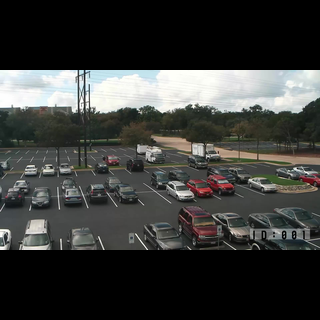

In [10]:
from PIL import Image
import requests
from io import BytesIO

# response = requests.get("https://ultralytics.com/images/bus.jpg")
# image_bytes = BytesIO(response.content)
# image = Image.open(image_bytes)
image = Image.open("output_image0003.jpg")
image = resize_with_padding_pillow(image, desired_size=320)
image

In [22]:
if is_raspberry_pi:
    start = time.perf_counter()
    # Remove this
    image, scale = common.set_resized_input(interpreter, image.size, lambda size: image.resize(size, Image.LANCZOS))
    if config["model"]["type"] == "SSD":

        interpreter.invoke()
        inference_time = time.perf_counter() - start
        objs = detect.get_objects(interpreter, 0.1, scale)
        print('%.2f ms' % (inference_time * 1000))

    elif config["model"]["type"] == "YOLO":

        scaled_tensor = set_inputs(image)
        interpreter.set_tensor(config['input']['tensor_id'], scaled_tensor)
        interpreter.invoke()
        objs = detection(interpreter)
    
    response = {"status": "success", "predictions": []}
    for obj in objs:
        label = labels.get(obj.id, obj.id)
        response["predictions"].append({
            "label": label,
            "id": obj.id,
            "score": obj.score,
            "bbox": {
                "xmin": int(obj.bbox.xmin),
                "ymin": int(obj.bbox.ymin),
                "xmax": int(obj.bbox.xmax),
                "ymax": int(obj.bbox.ymax)
            }
        })
else:
    response = {"status": "success", "predictions": []}

9.85 ms


In [23]:
frame = np.array(image)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

In [24]:
response["predictions"]

[{'label': 'car',
  'id': 0,
  'score': 0.5,
  'bbox': {'xmin': 0, 'ymin': 229, 'xmax': 11, 'ymax': 269}},
 {'label': 'car',
  'id': 0,
  'score': 0.3671875,
  'bbox': {'xmin': 22, 'ymin': 218, 'xmax': 51, 'ymax': 247}},
 {'label': 'car',
  'id': 0,
  'score': 0.33203125,
  'bbox': {'xmin': 249, 'ymin': 176, 'xmax': 275, 'ymax': 193}},
 {'label': 'car',
  'id': 0,
  'score': 0.26953125,
  'bbox': {'xmin': 23, 'ymin': 161, 'xmax': 36, 'ymax': 179}},
 {'label': 'car',
  'id': 0,
  'score': 0.2421875,
  'bbox': {'xmin': 309, 'ymin': 209, 'xmax': 319, 'ymax': 248}},
 {'label': 'car',
  'id': 0,
  'score': 0.2421875,
  'bbox': {'xmin': 0, 'ymin': 158, 'xmax': 6, 'ymax': 200}},
 {'label': 'car',
  'id': 0,
  'score': 0.2265625,
  'bbox': {'xmin': 276, 'ymin': 165, 'xmax': 317, 'ymax': 193}},
 {'label': 'car',
  'id': 0,
  'score': 0.21484375,
  'bbox': {'xmin': 104, 'ymin': 157, 'xmax': 118, 'ymax': 172}},
 {'label': 'car',
  'id': 0,
  'score': 0.15625,
  'bbox': {'xmin': 281, 'ymin': 164, 

In [25]:
for prediction in response["predictions"]:
    xmin = prediction["bbox"]["xmin"]
    ymin = prediction["bbox"]["ymin"]
    xmax = prediction["bbox"]["xmax"]
    ymax = prediction["bbox"]["ymax"]
    label = prediction["label"] 
    score = prediction["score"]
    id = prediction["id"]
    text = f"{label}, {score:.2f}"
    cv2.putText(frame, text, (xmin, ymin - 10), cv2.FONT_HERSHEY_COMPLEX,  0.4, (0, 255, 0), 1, cv2.LINE_AA)
    cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 1)


In [26]:
cv2.imwrite('frame.jpg', frame)

True

In [16]:
!pwd

/home/ajmalrasi/projects/detection_server/coral-tpu-object-detection-rpi5/server
